In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

In [3]:
T = np.pi/4
n_list = [10, 100, 1000, 10000]

In [2]:
def lambda_func(t):
    return np.sin(2*t)

In [4]:
def inhom_poisson(lambda_func, T, n):
    t = np.linspace(0, T, n)
    dt = T / n
    intensity = lambda_func(t)
    N = np.zeros(n)
    for i in range(1, n):
        p = intensity[i] * dt
        N[i] = N[i-1] + (np.random.uniform() < p)
    return N, t

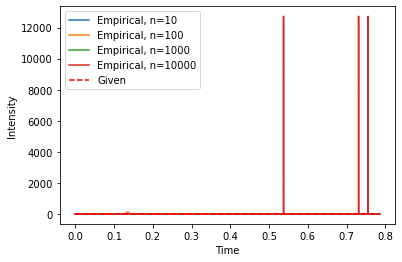

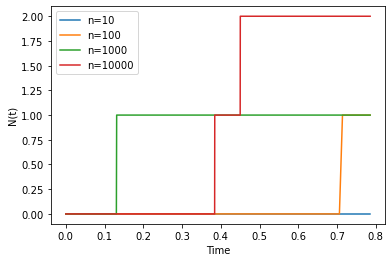

In [1]:
for n in n_list:
    N, t = inhom_poisson(lambda_func, T, n)
    intensity_emp = np.diff(N) / np.diff(t)
    intensity_emp = np.concatenate((intensity_emp, [intensity_emp[-1]]))
    plt.plot(t, intensity_emp, label='Empirical, n='+str(n))

# Plot the given intensity function
t = np.linspace(0, T, 1000)
intensity_given = lambda_func(t)
plt.plot(t, intensity_given, 'r--', label='Given')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# Plot the trajectories of the Poisson's processes
for n in n_list:
    N, t = inhom_poisson(lambda_func, T, n)
    plt.plot(t, N, label='n='+str(n))
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.legend()
plt.show()


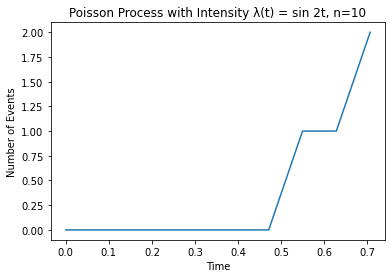

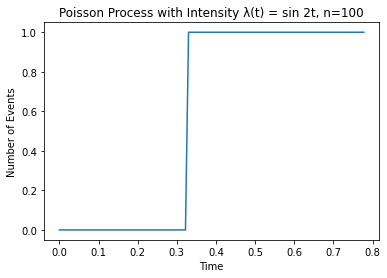

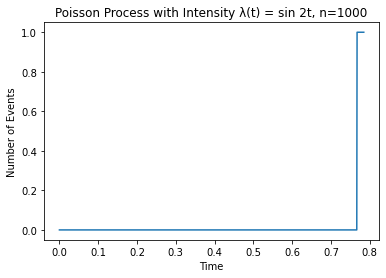

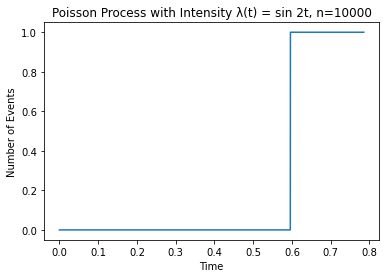

In [12]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Set parameters
T = np.pi/4
lambd = lambda t: np.sin(2*t)

# Define number of simulations
n_values = [10, 100, 1000, 10000]

# Simulate Poisson process
for n in n_values:
    # Generate time steps
    t = np.linspace(0, T, n+1)
    dt = T/(n+1)

    # Calculate intensity at each time step
    lambd_t = lambd(t[:-1])

    # Generate Poisson process
    N = np.zeros(n)
    for i in range(n):
        N[i] = N[i-1] + poisson.rvs(lambd_t[i]*dt)

    # Plot Poisson process
    plt.plot(t[:-1], N)
    plt.xlabel('Time')
    plt.ylabel('Number of Events')
    plt.title('Poisson Process with Intensity λ(t) = sin 2t, n={}'.format(n))
    plt.show()

